# 1. Raw data (prices)

In [11]:
# Choose the assets that will be included in the dataset
stocks <- c("AAPL", "AMZN", "MSFT", "GOOGL", "BRK-A", "JPM")
datalist <- list() 
t1 <- as.integer(ISOdate(2010,1,17,hour=0))
t2 <- as.integer(ISOdate(2022,2,17,hour=0))

for (stock in stocks) {
    url <- paste("https://query1.finance.yahoo.com/v7/finance/download/",
                 stock,
                 "?period1=",
                 as.integer(t1),
                 "&period2=",
                 as.integer(t2),
                 "&interval=1d&events=history&includeAdjustedClose=true",
                 sep="")
    data <- read.csv(url)
    data['Date'] <- as.Date(data$Date)    
    datalist[[stock]] <- data.frame(date=data$Date,price=data$Adj.Close)
}

# Merge
prices <- data.frame(datalist[[1]])
colnames(prices) <- c('date',stocks[1])
for (i in 2:length(datalist)) {
    temp <- datalist[[i]]
    colnames(temp) <- c('date', stocks[i])
    prices <- merge(prices,temp,by="date")
}
pricesdf <- data.frame(prices) 
tail(pricesdf)
print(summary(pricesdf[2:7]))

,date,AAPL,AMZN,MSFT,GOOGL,BRK.A,JPM
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3038,2022-02-09,175.7772,161.1895,309.1899,141.5920,483900,154.0848
3039,2022-02-10,171.6291,159.0035,300.4172,138.6200,480105,153.4452
3040,2022-02-11,168.1590,153.2935,293.1249,134.2825,479370,151.4478
3041,2022-02-14,168.3983,155.1670,293.0851,135.5260,472410,150.0408
3042,2022-02-15,172.2972,156.5105,298.5196,136.6085,473980,152.2350
3043,2022-02-16,172.0579,158.1005,298.1712,137.7380,474444,152.5105


      AAPL              AMZN              MSFT            GOOGL       
 Min.   :  5.856   Min.   :  5.431   Min.   : 17.82   Min.   : 10.91  
 1st Qu.: 16.300   1st Qu.: 12.963   1st Qu.: 25.26   1st Qu.: 18.98  
 Median : 26.198   Median : 30.844   Median : 47.05   Median : 36.58  
 Mean   : 42.296   Mean   : 54.557   Mean   : 83.79   Mean   : 44.79  
 3rd Qu.: 48.357   3rd Qu.: 88.271   3rd Qu.:107.95   3rd Qu.: 57.98  
 Max.   :181.260   Max.   :186.571   Max.   :340.88   Max.   :149.84  
     BRK.A             JPM        
 Min.   :100000   Min.   : 21.07  
 1st Qu.:145702   1st Qu.: 36.08  
 Median :216266   Median : 54.05  
 Mean   :231926   Mean   : 68.92  
 3rd Qu.:303000   3rd Qu.: 95.82  
 Max.   :485379   Max.   :168.01  


# 2. Compute log-returns
The function 'genretdf' generates log-returns according to the following formula:
$$r_{t} = \ln\left(\frac{p_{t}}{p_{t-1}}\right)\times 100,$$ where $p_t$ denotes the price of that stock at day $t$.

In [3]:
# Helper function used to compute log-returns:
genretdf <- function(pricesdf, nonans = TRUE) {
  prices <- data.matrix(pricesdf)
  ret <- 100*(diff(log(prices[,2:ncol(prices)])))  
  TT <- nrow(ret)
  pricesdf <- pricesdf[1:TT+1,]
  date <- as.Date(pricesdf$date) 
  retdf <- data.frame(date,ret)
  if (nonans==TRUE){
    retdf <- na.omit(retdf) 
  }
  return(retdf)
  }

In [4]:
retdf <- genretdf(pricesdf, nonans=TRUE)
tail(retdf) 
print(summary(retdf[2:7]))

,date,AAPL,AMZN,MSFT,GOOGL,BRK.A,JPM
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3037,2022-02-09,0.8259639,-0.1388698,2.15998410,1.5609308,0.38719210,0.4159418
3038,2022-02-10,-2.3881808,-1.3654508,-2.87833913,-2.1213307,-0.78734438,-0.4159418
3039,2022-02-11,-2.0425570,-3.6571773,-2.45735780,-3.1790543,-0.15320882,-1.3102527
3040,2022-02-14,0.1422064,1.2147597,-0.01355589,0.9217714,-1.46254892,-0.9333840
3041,2022-02-15,2.2888594,0.8621086,1.83725072,0.7955696,0.33178741,1.4518011
3042,2022-02-16,-0.1389868,1.0107781,-0.11679385,0.8234173,0.09784654,0.1808054


      AAPL                AMZN               MSFT               GOOGL          
 Min.   :-13.77082   Min.   :-13.5325   Min.   :-15.94533   Min.   :-12.36846  
 1st Qu.: -0.71097   1st Qu.: -0.8409   1st Qu.: -0.67027   1st Qu.: -0.65812  
 Median :  0.09605   Median :  0.1050   Median :  0.06943   Median :  0.08374  
 Mean   :  0.10740   Mean   :  0.1055   Mean   :  0.08301   Mean   :  0.07354  
 3rd Qu.:  1.04197   3rd Qu.:  1.1258   3rd Qu.:  0.87892   3rd Qu.:  0.88090  
 Max.   : 11.31576   Max.   : 14.6225   Max.   : 13.29290   Max.   : 15.06453  
     BRK.A               JPM           
 Min.   :-8.93263   Min.   :-16.21060  
 1st Qu.:-0.54212   1st Qu.: -0.76728  
 Median : 0.03357   Median :  0.04653  
 Mean   : 0.05117   Mean   :  0.05203  
 3rd Qu.: 0.63345   3rd Qu.:  0.91482  
 Max.   :10.69468   Max.   : 16.56204  


# 3. Visualization

In [12]:
# Load required libraries for visualization:
library(ggplot2)
library(ggpubr)

## 3.1. Individual series:

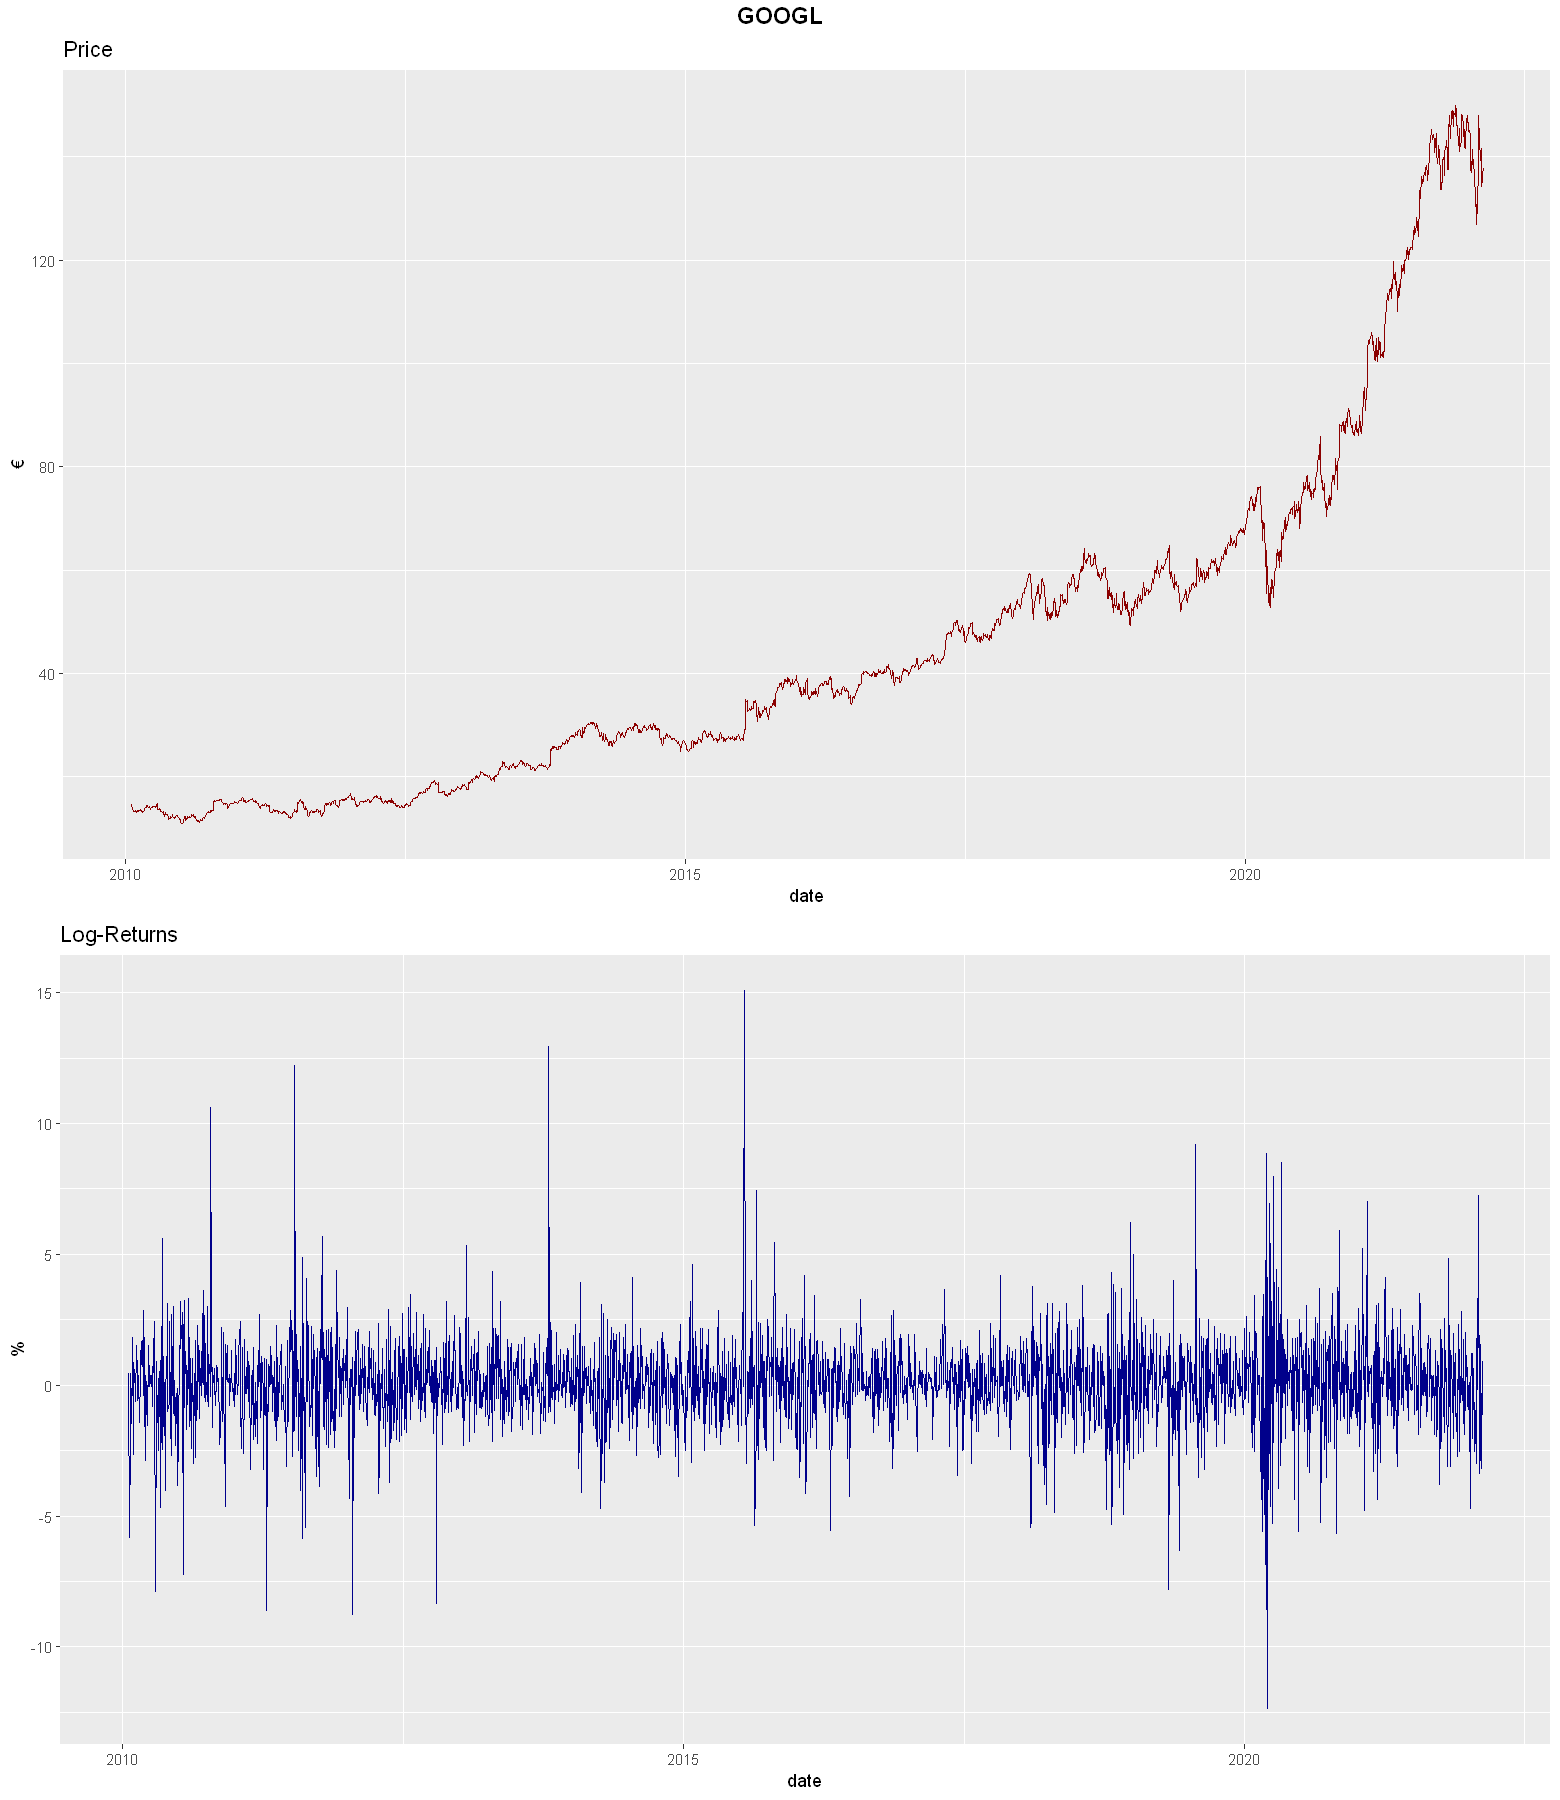

In [9]:
# Choose an asset:
asset <- 'GOOGL'

plotdf <- data.frame(retdf[,"date"],retdf[,asset],pricesdf[-1,asset])
names(plotdf) <- c("date","r","p")
rplot <- ggplot(plotdf, aes(x = date)) + 
  geom_line(aes(y = r), size = 0.3, color = "darkblue") +
  labs(title = "Log-Returns", 
    #subtitle = print("Total sample"),
    x = "date",
    y = "%" )

pplot <- ggplot(plotdf, aes(x = date)) + 
  geom_line(aes(y = p), size = 0.3, color = "darkred") +
  labs(title = "Price", 
    #subtitle = print("Total sample"),
    x = "date",
    y = "€" )

options(repr.plot.width=13, repr.plot.height=15)
figure <- ggarrange(pplot, rplot, 
                    ncol = 1, nrow = 2)

annotate_figure(figure, top = text_grob(asset, color = "black", face = "bold", size = 14))  


## 3.2. Pair correlations

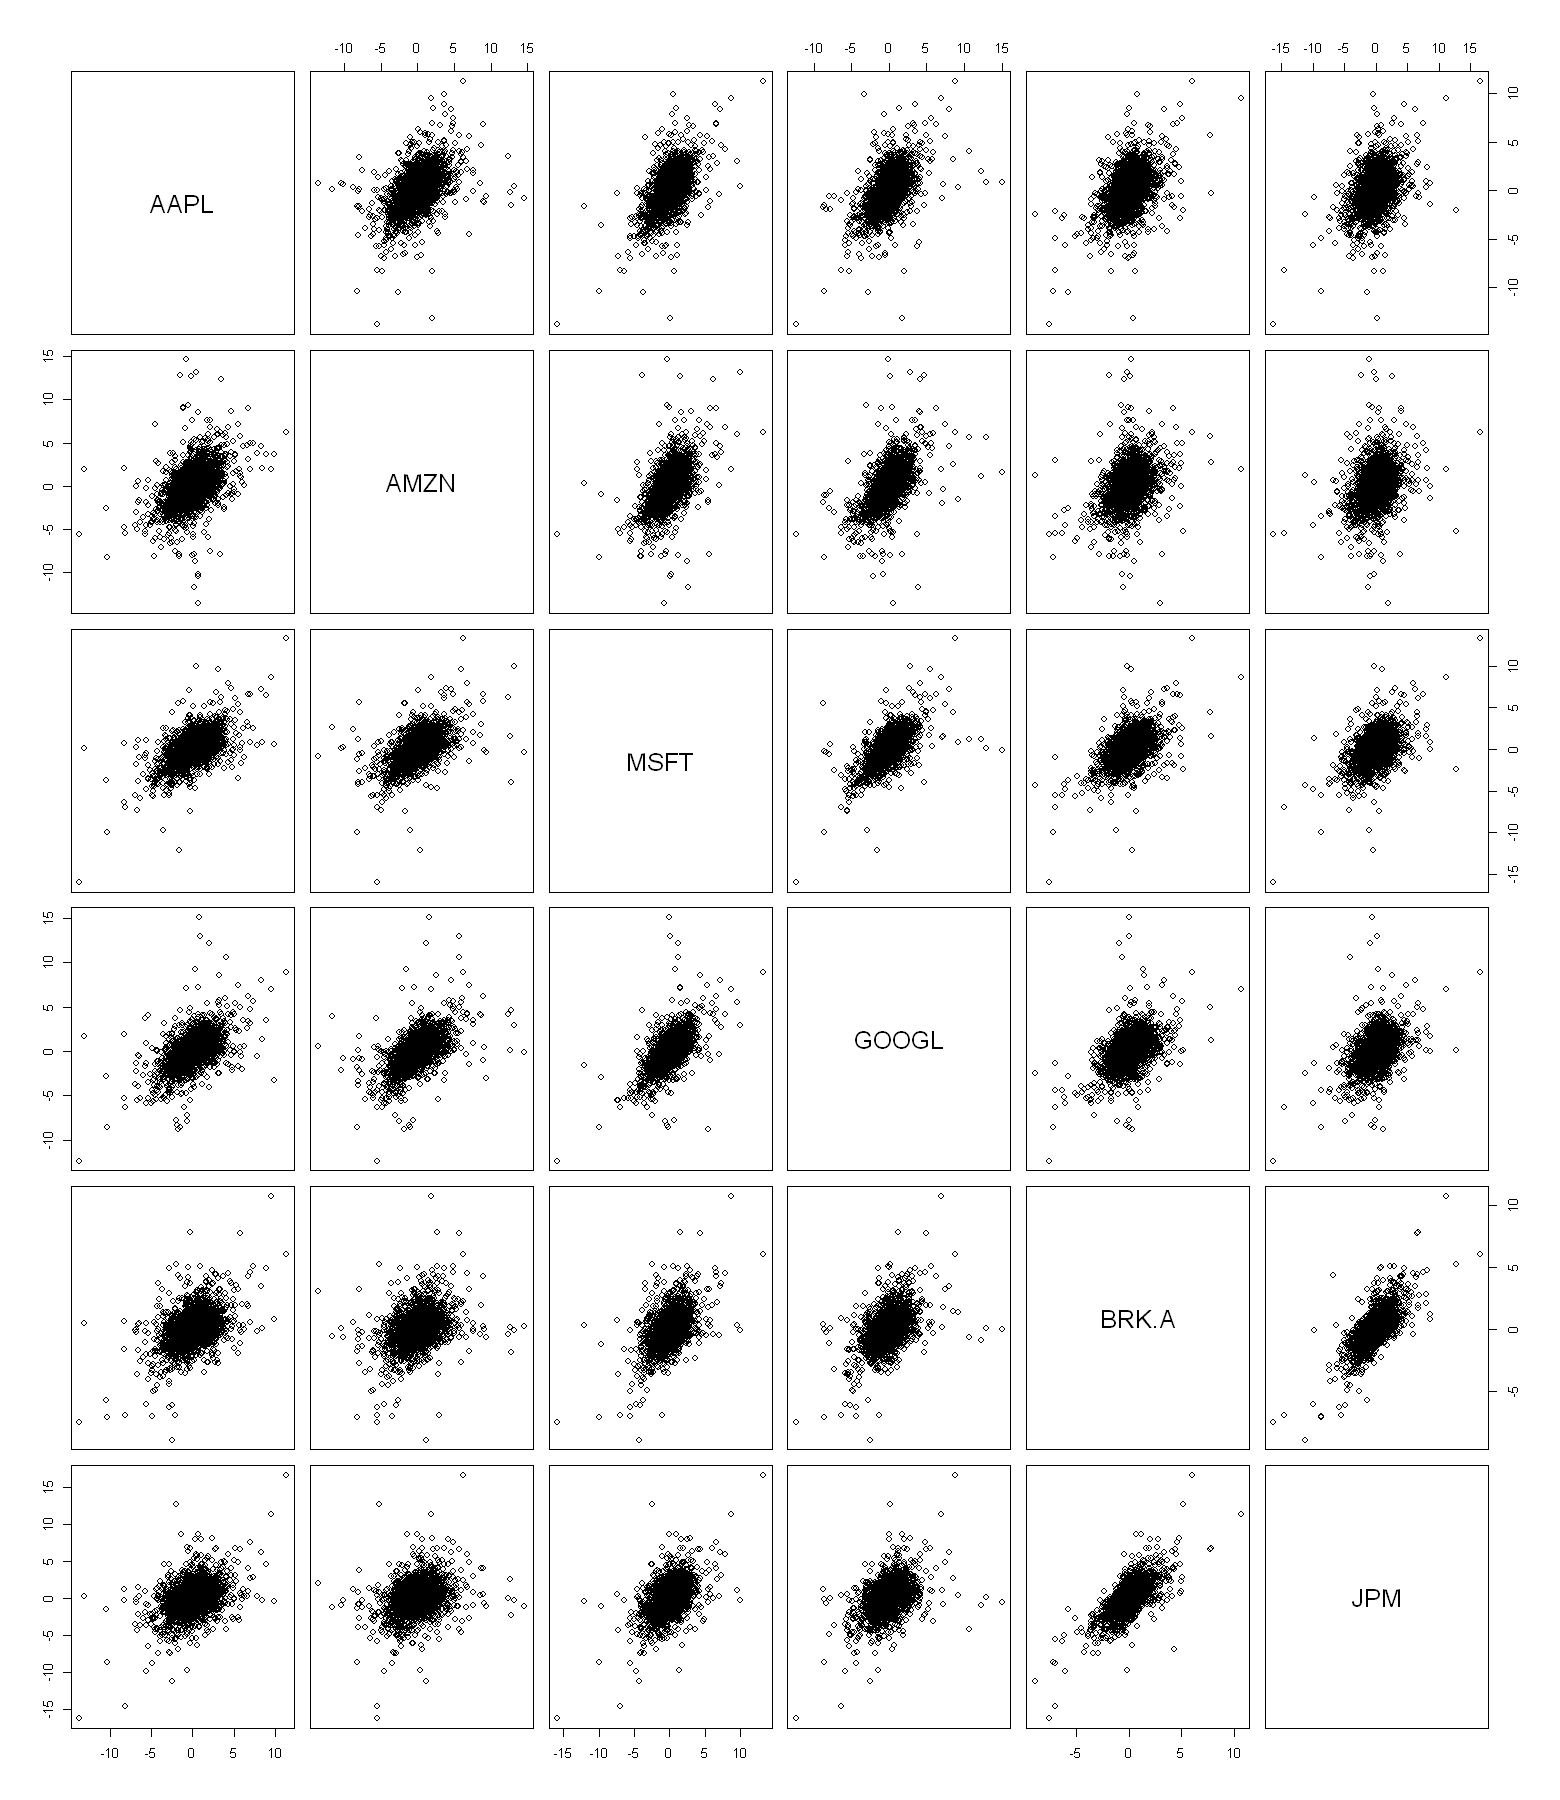

In [10]:
pairs(retdf[,-1])